<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/RNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# start

In [1]:
!wget https://github.com/LinkedInLearning/recurrent-neural-networks-2478142/archive/refs/heads/main.zip

--2023-06-27 13:46:52--  https://github.com/LinkedInLearning/recurrent-neural-networks-2478142/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/LinkedInLearning/recurrent-neural-networks-2478142/zip/refs/heads/main [following]
--2023-06-27 13:46:52--  https://codeload.github.com/LinkedInLearning/recurrent-neural-networks-2478142/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [   <=>              ]  66.69M  20.4MB/s    in 3.3s    

2023-06-27 13:46:55 (20.4 MB/s) - ‘main.zip’ saved [69934022]



In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/main.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
df = pd.read_csv('/content/recurrent-neural-networks-2478142-main/Exercise Files/FB-stock-prices.csv')

In [5]:
df.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


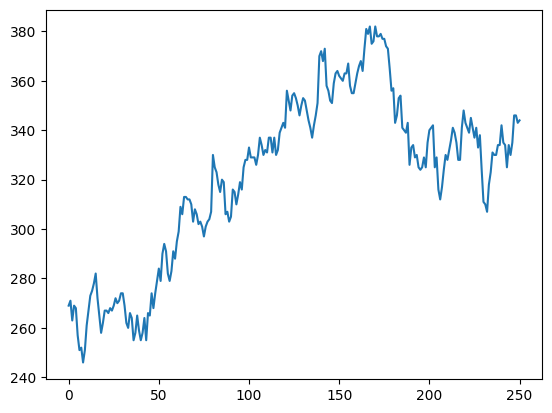

In [6]:
plt.plot(df['Price'])

In [7]:
scale =StandardScaler()

In [8]:
scaled_prices = scale.fit_transform(df[["Price"]].values)

In [9]:
total_size = len(scaled_prices)

#Test dataset size
test_size = 50

#Training dataset size
train_size = total_size - test_size
print(train_size, test_size)

training_prices = scaled_prices[0:train_size,:]
test_prices = scaled_prices[train_size:,:]

print(training_prices.shape, test_prices.shape)

201 50
(201, 1) (50, 1)


In [10]:
def rnn(data,lookback=1):

    data_x,data_y = [],[]

    for i in range(len(data) - lookback - 1):
        a = data[i:(i + lookback),0]
        data_x.append(a)
        data_y.append(data[i + lookback,0])
    return np.array(data_x), np.array(data_y)

In [11]:
lookback = 25
train_req_x, train_req_y = rnn(training_prices, lookback=25)
train_req_x = np.reshape (train_req_x,(train_req_x.shape[0],1,train_req_x.shape[1]))

In [12]:
train_req_x.shape, train_req_y.shape

((175, 1, 25), (175,))

In [13]:
scaled_prices.shape

(251, 1)

In [14]:
len(training_prices)

201

In [15]:
training_prices[1:(1+25),0]

array([-1.4393189 , -1.66896946, -1.49673154, -1.52543786, -1.84120738,
       -2.01344531, -1.98473899, -2.15697691, -2.01344531, -1.7263821 ,
       -1.55414418, -1.38190626, -1.32449362, -1.23837465, -1.12354937,
       -1.41061258, -1.61155682, -1.81250106, -1.69767578, -1.55414418,
       -1.55414418, -1.5828505 , -1.52543786, -1.55414418, -1.49673154])

In [16]:
q = []

In [17]:
q.append(training_prices[0:(0+25),0])

In [18]:
np.array(q)

array([[-1.49673154, -1.4393189 , -1.66896946, -1.49673154, -1.52543786,
        -1.84120738, -2.01344531, -1.98473899, -2.15697691, -2.01344531,
        -1.7263821 , -1.55414418, -1.38190626, -1.32449362, -1.23837465,
        -1.12354937, -1.41061258, -1.61155682, -1.81250106, -1.69767578,
        -1.55414418, -1.55414418, -1.5828505 , -1.52543786, -1.55414418]])

In [19]:
range(len(training_prices-26))

range(0, 201)

In [20]:
train_req_x

array([[[-1.49673154, -1.4393189 , -1.66896946, ..., -1.5828505 ,
         -1.52543786, -1.55414418]],

       [[-1.4393189 , -1.66896946, -1.49673154, ..., -1.52543786,
         -1.55414418, -1.49673154]],

       [[-1.66896946, -1.49673154, -1.52543786, ..., -1.55414418,
         -1.49673154, -1.41061258]],

       ...,

       [[ 1.63225739,  1.66096372,  1.60355107, ...,  0.11082241,
          0.08211609,  0.11082241]],

       [[ 1.66096372,  1.60355107,  1.60355107, ...,  0.08211609,
          0.11082241,  0.22564769]],

       [[ 1.60355107,  1.60355107,  1.51743211, ...,  0.11082241,
          0.22564769,  0.11082241]]])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [22]:
model = Sequential()
model.add(SimpleRNN(32,input_shape=(1,lookback)))
model.add(Dense(1))

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam',
    metrics = ['mse']
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1856      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_req_x,
          train_req_y,
          epochs = 10)

Epoch 1/10
6/6 [==============================] - 6s 6ms/step - loss: 0.5176 - mse: 0.5176
Epoch 2/10
6/6 [==============================] - 0s 4ms/step - loss: 0.2777 - mse: 0.2777
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.2470 - mse: 0.2470
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 0.1739 - mse: 0.1739
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.1551 - mse: 0.1551
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.1218 - mse: 0.1218
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.1063 - mse: 0.1063
Epoch 8/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0939 - mse: 0.0939
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0850 - mse: 0.0850
Epoch 10/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0789 - mse: 0.0789


In [25]:
test_x,test_y = rnn(test_prices,lookback=25)

In [26]:
test_x.shape,test_y.shape

((24, 25), (24,))

In [27]:
test_x = np.reshape(test_x,(test_x.shape[0],1,test_x.shape[1]))

In [28]:
test_x.shape

(24, 1, 25)

In [29]:
model.evaluate(test_x,test_y)

1/1 [==============================] - 0s 195ms/step - loss: 0.1369 - mse: 0.1369


[0.13691537082195282, 0.13691537082195282]

<Axes: >

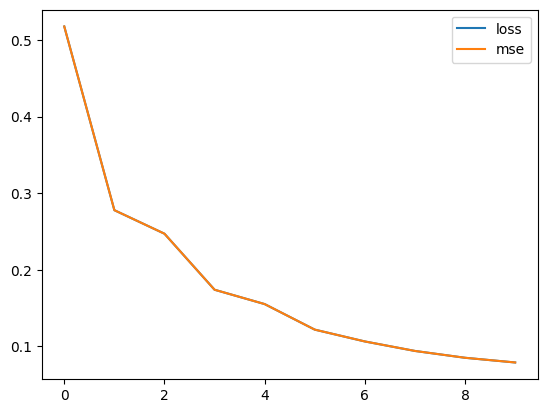

In [30]:
pd.DataFrame(history.history).plot()

1/1 [==============================] - 0s 19ms/step


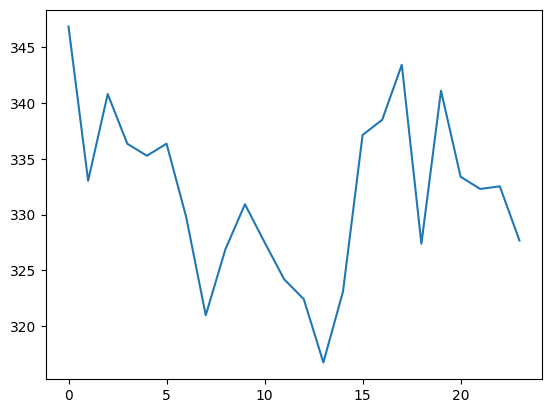

In [35]:
plt.plot(scale.inverse_transform(model.predict(test_x)))

In [ ]:
test_x[1].shape

In [ ]:
np.reshape(test_x[1],(test_x.shape,1,test_x[1].shape))

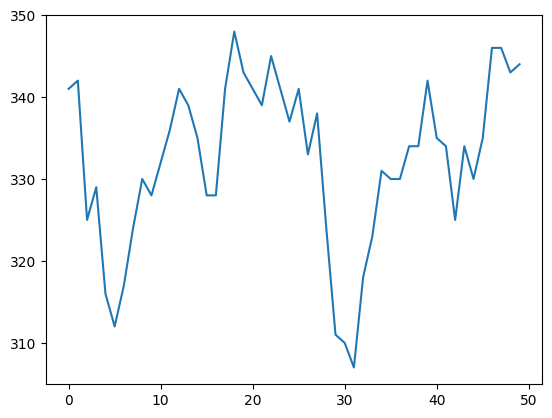

In [41]:
plt.plot(scale.inverse_transform(test_prices))

In [46]:
pred = scale.inverse_transform(model.predict(test_x))

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 36ms/step


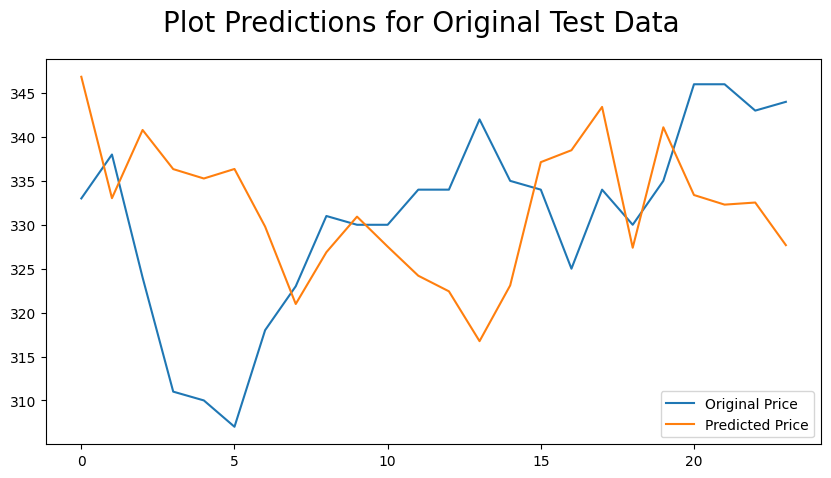

In [53]:
orig_test_values = df[[ "Price"]].loc[total_size-len(pred):]
orig_test_values.reset_index(drop=True, inplace=True)
plt. figure(figsize=(10,5)). suptitle("Plot Predictions for Original Test Data", fontsize=20)
plt.plot(orig_test_values, label="Original Price")
plt.plot (scale.inverse_transform(model.predict(test_x)), label="Predicted Price")
plt. legend ()
plt.show ()

In [88]:
new = df[['Price']].loc[len(df)-25:]
new = np.array(new,dtype=np.float32)

In [89]:
new.dtype

dtype('float32')

In [90]:
new_scale = scale.transform(new)

In [91]:
new_shp = scale.transform(new.reshape(-1,1))

In [92]:
new_scale.shape,new_shp.shape

((25, 1), (25, 1))

In [93]:
model_input = np. reshape(new_scale,(new_scale.shape[1],1, new_scale.shape[0]))

In [94]:
model_input.shape,test_x.shape

((1, 1, 25), (24, 1, 25))

In [95]:
new_pred = model.predict(model_input)

1/1 [==============================] - 0s 22ms/step


In [96]:
scale.inverse_transform(new_pred)

array([[339.3988]], dtype=float32)